### Ryogo Katahira

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.constants import G, h, c, k_B
%matplotlib inline

# Homework 3 - Part 3

### Part A
Below is the code for the Planck function from Lab 2. Modify `planck_func` to create a new function called `planck_norm` that does the same thing as the Planck function, but ***normalizes*** the function by the peak value. To do this, divide the flux array by its maximum value. This serves to make all of the curves peak at 1 so that you can easily compare ***where*** they peak.

In [2]:
#This is just the function from Lab 2! Modify this function as described above
def planck_func(temp):
    lambdas = (np.arange(1,100000,1))*u.nm
    T = temp*u.K
    bs = 2*h*c**2/lambdas**5*(1/(np.exp(h*c/(lambdas*k_B*T))-1))
    bs.decompose()
    bs = bs.to(u.W/u.m**2/u.nm)
    Planck=np.array([lambdas,bs])
    return(Planck)

def planck_norm(temp):
    lambdas = (np.arange(1,100000,1))*u.nm
    T = temp*u.K
    bs = 2*h*c**2/lambdas**5*(1/(np.exp(h*c/(lambdas*k_B*T))-1))
    bs.decompose()
    bs = bs.to(u.W/u.m**2/u.nm)
    bs = bs/np.max(bs)
    Planck=np.array([lambdas,bs])
    return(Planck)

### Part B

Like you did in Lab 3, make a plot that shows the difference between a 6000K (sun-like) star's blackbody curve and those of stars that are slightly warmer (7000K) and cooler (5000K). This time, plot ***normalized*** flux along the y-axis.

In [3]:
#define your variables to be plotted (outputs from the function) here
planck6000 = planck_norm(6000)
planck7000 = planck_norm(7000)
planck5000 = planck_norm(5000)

/usr/local/lib/python3.10/dist-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


6000K max wavelength:  483.0
7000K max wavelength:  414.0
5000K max wavelength:  580.0


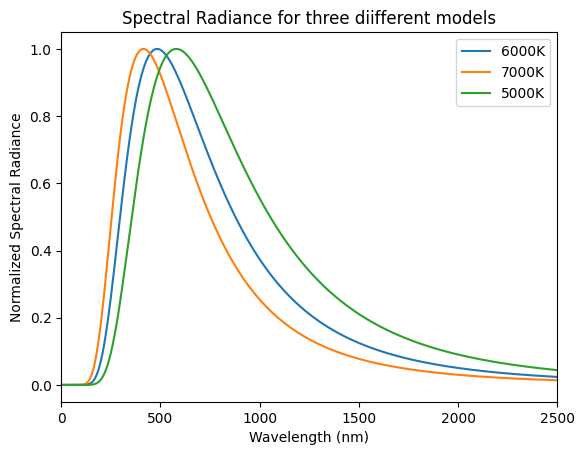

In [4]:
#insert your plot commands here

fig, ax = plt.subplots()

ax.plot(planck6000[0], planck6000[1], label="6000K")
ax.plot(planck7000[0], planck7000[1], label="7000K")
ax.plot(planck5000[0], planck5000[1], label="5000K")

ax.set_title("Spectral Radiance for three diifferent models")
ax.set_xlim(0, 2500)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Normalized Spectral Radiance")
plt.legend()

print("6000K max wavelength: ", planck6000[0][np.where(planck6000[1] == np.max(planck6000[1]))[0][0]])
print("7000K max wavelength: ", planck7000[0][np.where(planck7000[1] == np.max(planck7000[1]))[0][0]])
print("5000K max wavelength: ", planck5000[0][np.where(planck5000[1] == np.max(planck5000[1]))[0][0]])

plt.show()

### Part C
Write 1-2 sentences describing what normalization does and why it is useful. What physical properties are corrupted/lost by displaying the normalized flux instead of the true flux, and which are preserved? Include specific descriptions of the differences between your plot from Lab 2 and the one above.

*Normalization converts y-values to the ratios to the peak value. Therefore, the y-max is always 1, which makes it easier to compare values in different scales.*

*Specifically, normalization tells us how y-values change due to x-values. This allows us to consider how the influence of independent values differs for different models. However, this doesn’t allow us to compare y-values in scale as they are converted to ratios.*

*In this case, it allows us to see the different wavelengths of peak values much easily, but they all have peak=1 instead of different y-values in lab 2.*

Then, in another 1-2 sentences, describe the differences in peak wavelength between these three stars. You should include a precise value for the peak wavelength of each star (*Hint: find the **index** of the maximum flux value and use that to get the corresponding wavelength*).

*Peak wavelength for 5000K is 580 nm, 6000K is 483 nm, and 7000K is 414 nm. The higher the temperatrue is, the longer the wavelength is. The product of Temperatrue and wavelengths seems to be constant ~2900000 (nm K).*

### Instructions for Submitting

Before submitting any Google Colab notebook for grading, please follow the following steps:

**1) Make sure your name in a markdown cell at the top of the file.**

**2) Save the Colab notebook as a PDF.**

**3) Attach the PDF to any other parts of your assignment (you can use a tool like [smallPDF](https://smallpdf.com/merge-pdf)), then submit as a single PDF to Gradescope.**

***IMPORTANT NOTE: CHECK YOUR PDF BEFORE SUBMITTING.*** If any code/outputs/comments get cut off and prevent us from grading your work, you will not get graded on the cut-off part of the assignment. Here are steps that seem to work well on Google Chrome:
* Make sure all sidebars (like the help/documentation sidebars to the right of the code) are closed.
* Go to Tools > Settings within Colab. Make sure default page layout is "vertical". (Setting the theme to "dark mode" is optional but may also help make your code more readable.)
* Then, go to File > Print within Colab (*not* from the Chrome toolbar). Set "Destination" as "Save to PDF". Under the "More options" tab, make sure "Background graphics" is checked. You may also try changing your margins to "minimum" or "none" to make sure longer comments aren't getting cut off.
* If the end of your notebook is getting cut off, try double clicking on the next cell as if you're going to edit it, then go straight to File > Print without clicking anywhere else on the notebook.

If you run into issues creating your PDF, please let us know so we can offer alternative solutions.
